In [ ]:
#MAJOR PROJECT 2
#Choose any dataset of your choice and apply k Means Clustering
#In Clustering-There is no y(output),we only consider input i/p to train our model
#1.take data and create dataframe
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/JangirSumit/kmeans-clustering/master/driver-data.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [ ]:
df.shape#4000 rows and 3 cols

(4000, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [ ]:
#Input-	mean_over_speed_perc
#4.Divide into i/p
x=df.iloc[:,1:3].values
x


array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

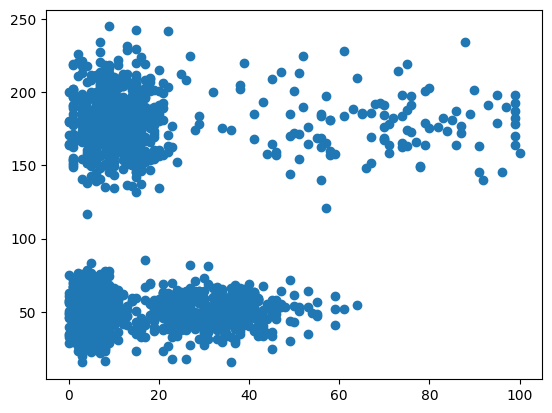

In [ ]:
#Visualisation 
import matplotlib.pyplot as plt
plt.scatter(df['mean_over_speed_perc'],df['mean_dist_day'])
# here we got only one cluster before applying any clustering technique(reason wise colour is same)

In [ ]:
#here our main task is to find out the number of cl
import numpy as np
np.sqrt(4000)#4000 is the total number of points #No. of cluster-k # K value should not exceed the square root # hence k value should be in range 2 to 63
          

63.245553203367585

In [ ]:
import warnings
warnings.filterwarnings("ignore")

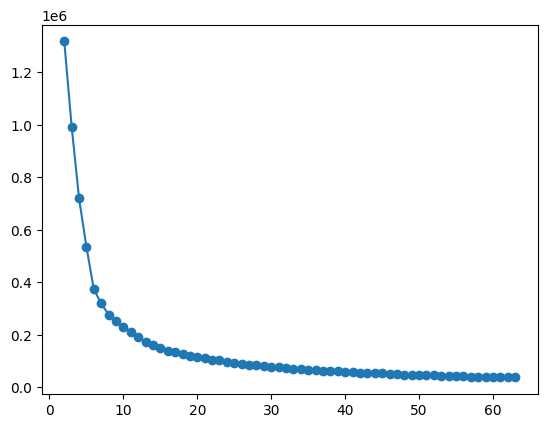

In [ ]:
#we need to find out the number of clusters(k)
#1.Elbow Method-slghtly confusing
#2.Silhouette score method-very accurate

#1.Elbow Method
from sklearn.cluster import KMeans
k=range(2,64) #as range is between 2 to 63

sse = []#blank list

#for i in range(2,64): 
for i in k:
  model_demo = KMeans(n_clusters=i,random_state=0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)#inertia_-calculates the sum of square error
plt.scatter(k,sse)
plt.plot(k,sse)

In [ ]:
#now consider the elbow point at which the elbow is more prominent(projection from something)
#consider k as 6 for now, but not sure

63 Cluster,score=0.3270173041633992


<BarContainer object of 1 artists>

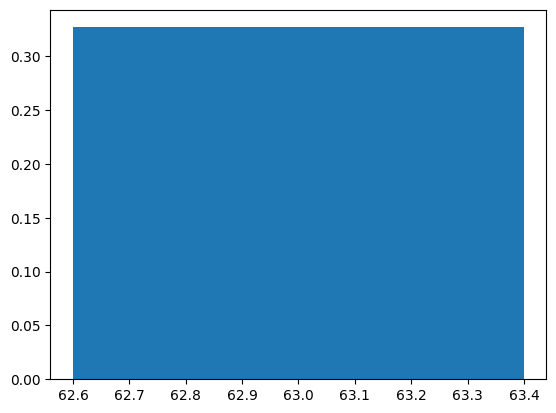

In [ ]:
#2.Silhouette score method
from sklearn.metrics import silhouette_score
k=range(2,64)
for i in k:
  model_demo = KMeans(n_clusters=i,random_state=0)
  model_demo.fit(x)
y_pred=model_demo.predict(x)
print(f"{i} Cluster,score={silhouette_score(x,y_pred)}")
plt.bar(i,silhouette_score(x,y_pred))

In [ ]:
#CONFIRMATION:The no. of clusters to be considered 63

In [ ]:
#7.Apply Clusterer
K=63
from sklearn.cluster import KMeans
model=KMeans(n_clusters=K,random_state=0)
model.fit(x)

KMeans(n_clusters=63, random_state=0)

In [ ]:
y=model.predict(x)#predict output
y

array([47,  8, 14, ...,  5, 52, 38], dtype=int32)

In [ ]:
y.size

4000

In [ ]:
x[y == 1,1]
#first '1' is cluster number 1 and second '1' is column number 1
#the value of input,when cluster 1 is selected and column index 1 is selected

array([15., 17., 19., 16., 15., 15., 15., 14., 12., 14., 11., 15., 13.,
       19., 12., 11., 14., 14., 16., 11., 11., 16., 18., 19., 13., 15.,
       11., 17., 13., 11., 13., 17., 17., 14., 17., 21., 11., 11., 13.,
       11., 16., 13., 13., 14., 12., 12., 14., 15., 14., 17., 15., 11.,
       18., 20., 20., 12., 14., 19.])

In [ ]:
np.unique(y,return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], dtype=int32),
 array([278,  58,  12,  45, 190,  66, 166,  15,  50,  15,  13,  54, 102,
         34,  40,   9,  28,   5, 237,  14, 126,   8, 235,   3,  33,  32,
         85,  46,   6,  51, 124,   6,  46, 181, 144,   8,   7, 229,  67,
         23,  35,   5,  12,   8,  25,  52,  39,  10,  20,   6, 264,   6,
         63,   5,   9,  38,  56, 188, 166,  38,  28,  29,   7]))

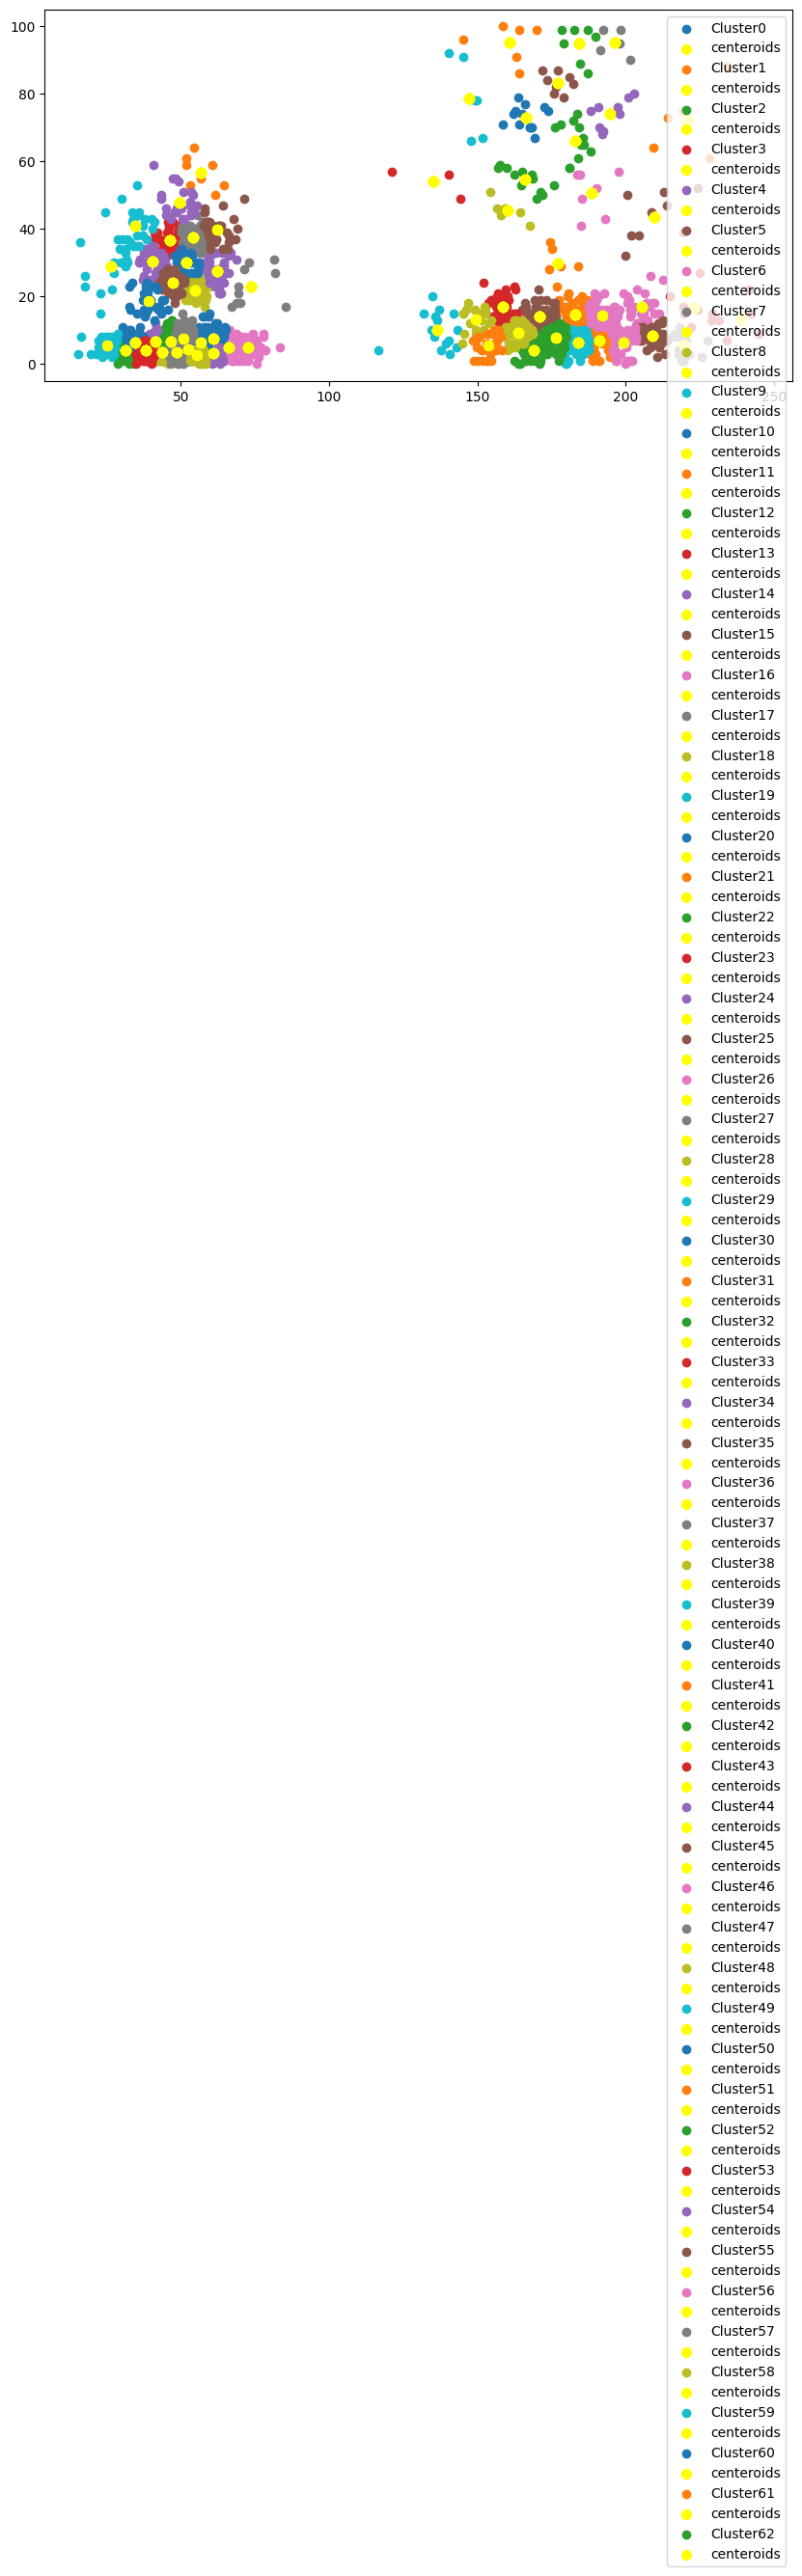

In [ ]:
#FINAL VISUALISATION
plt.figure(figsize= (10,5))
for i in range(K):
 plt.scatter(x[y == i,0],x[y == i,1],label=f'Cluster{i}')
 plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=50,c='yellow',label='centeroids')

 plt.legend()